## crysolの実行

crysolのヘルプを表示させてみると、

In [ ]:
!crysol -h

In [ ]:

  Usage in the batch mode: 
  crysol [<Inp_File1>]...[<Inp_FileK>] [<Dat_File>]
  [-param1 <param1>]...[-paramN <paramN>] 

    ：
  途中略
    ：
    
  Examples:                                       
                                                  
  crysol 6lyz.pdb -lm 20                          
  Calculate scattering intensity from the PDB file
  6lyz.pdb with Lmax = 20 and without fitting     
                                                  
  crysol mod*.pdb exp.dat -un 2                   
  Process PDB files with the names beginning with 
  "mod" and fit experimental data exp.dat with    
  scattering vector given in inverse nanometres.  
                                                  
  crysol *.sav lyzexp.dat                         
  Restore the scattering intensity from all       
  sav files in the current directory and fit      
  the experimental data in the file lyzexp.dat    

Report bugs to <atsas@embl-hamburg.de>.

ご覧のように、コマンド実行の結果がセルとして表示されているのがわかる。

今、リゾチウムの結晶構造から `6lyz.pdb` を計算してみよう。
`crysol` の引数はデータ点数を201とするために ``-ns 201`` としている。

In [ ]:
!crysol 6lyz.pdb -lm 20 -ns 201

In [ ]:
***  ------------------------------------------------  *** 
  ***    C R Y S O L  Wintel/UNIX/Linux version 2.8.4    *** 
  ***  Please reference: D.Svergun, C.Barberato          *** 
  ***   & M.H.J.Koch (1995) J. Appl.Cryst., 28, 768-773  *** 
  ***   Version (LMAX=99) for small and wide angles      *** 
  ***        Last revised  ---  10/12/18 10:00           *** 
  ***   Copyright (c) ATSAS Team                         *** 
  ***   EMBL, Hamburg Outstation, 1995 - 2018            *** 
  ***  ------------------------------------------------  *** 

  ------------------------------------------------ 
                  Program options :       
  0 - evaluate scattering amplitudes and envelope 
  1 - evaluate only envelope and Flms 
  2 - read CRYSOL information from a .sav file 
   Type crysol -help for batch mode use      
  ------------------------------------------------ 

  ------------------------------------------------ 
          Following file names will be used: 
 6lyz01.log -- CRYSOL log-file          (ASCII) 
 6lyz01.int -- scattering intensities   (ASCII) 
 6lyz01.alm -- net partial amplitudes   (binary)
  ------------------------------------------------ 
  ----------  Reciprocal space grid  -------------
   ( in s = 4*pi*sin(theta)/lambda [1/angstrom] ) 
 Read atoms and evaluate geometrical center ... 
  Number of atoms read .................................. : 1001
  Number of discarded waters ............................ : 101
 Percent processed      10  20  30  40  50  60  70  80  90 100
 Processing atoms   :>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 Center of the excess electron density:  0.452 -0.004  0.276
 Processing envelope:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 Processing envelope:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 --- Structural parameters (sizes in angstroms) --- 
 Electron   rg   :  13.99       Envelope   Rg      :  14.08    
 Shape      Rg   :  13.97       Envelope  volume   : 0.1806E+05
 Shell    volume : 0.1129E+05   Envelope  surface  :  3150.    
 Shell      Rg   :  18.98       Envelope  radius   :  25.49    
 Shell    width  :  3.000       Envelope  diameter :  49.04    
 Molecular weight: 0.1432E+05   Dry volume         : 0.1736E+05
 Displaced volume: 0.1741E+05   Average atomic rad.:  1.607    
 Number of residuals :   129
 Average atomic volume .................................. : 17.40
 Rg ( Atoms - Excluded volume + Shell ) ................. : 15.04
 Rg from the slope of net intensity ..................... : 15.41
 Average electron density ............................... : 0.4383
 Intensities    saved to file 6lyz01.int
 I_abs(s)[cm^-1]/c[mg/ml] saved to file 6lyz01.abs
 Net amplitudes saved to file 6lyz01.alm

`abs` 、 `alm` 、 `int` それにプログラムのログである `log`　という拡張子のファイルが `crysol` 実行毎に生成される。

散乱曲線のデータは `abs` と `int` であるが使うのは `int` の方である。

実際にファイルの中身を一部表示させると、

In [ ]:
!head "6lyz00.int"

In [ ]:
 Dif/Atom/Shape/Bord 6lyz.pdb     Dro:  0.030 Ra: 1.6074 Rg: 15.41 Vtot:  18057.          
  0.000000E+00  0.484317E+07  0.582674E+08  0.338289E+08  0.147208E+06
  0.250000E-02  0.484078E+07  0.582433E+08  0.338151E+08  0.147088E+06
  0.500000E-02  0.483365E+07  0.581719E+08  0.337741E+08  0.146731E+06
  0.750000E-02  0.482179E+07  0.580530E+08  0.337059E+08  0.146137E+06
  0.100000E-01  0.480523E+07  0.578869E+08  0.336106E+08  0.145308E+06
  0.125000E-01  0.478402E+07  0.576741E+08  0.334884E+08  0.144250E+06
  0.150000E-01  0.475822E+07  0.574149E+08  0.333397E+08  0.142965E+06
  0.175000E-01  0.472792E+07  0.571101E+08  0.331648E+08  0.141462E+06
  0.200000E-01  0.469315E+07  0.567603E+08  0.329640E+08  0.139740E+06

ここで最初の行は理論散乱曲線を計算するためのパラメータで、使用するのは
1列目の $q$ と2列目の $I(q)$ のみである。残念ながら`crysol`の出力はすぐ使えるようになっていないので加工して保存してやる必要がある。

## 理論データの保存

さっそくこのファイルを読み込んでみよう。普通にpythonでファイルを読むこともできるが、せっかくなので、 
`pandas` (https://pandas.pydata.org/) と呼ばれるpythonで
データ解析を行うためのパッケージを使ってみる。

`pandas`には1次元の`Series`と2次元の`DataFrame`という２つのデータ構造が用意されているが、小角では普通`DataFrame`を使う。

`pandas`だけでなく描画や数値計算など必要なモジュールをインポートしておく

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

タンパク質溶液散乱の場合、散乱強度 $I(q)$ は重量濃度 $c$ で割った形で実験値として使用するので、２列目の $I(q)$
を分子体積 `Vtot` で割っておく。

`Vtot` は ``header`` に書きこまれているので、最初に `Vtot` だけ取り出しておく。

In [2]:
f=open("6lyz00.int")
header=f.readline()
Vtot=float(header.split(":")[-1])
print('Vtot=',Vtot)

Vtot= 18057.0


In [3]:
df=pd.read_csv("6lyz00.int",delim_whitespace=True,header=0,names=["q","I"],usecols=[0,1])

In [4]:
df

q          I
0    0.0000  4843170.0
1    0.0025  4840780.0
2    0.0050  4833650.0
3    0.0075  4821790.0
4    0.0100  4805230.0
..      ...        ...
196  0.4900    24998.3
197  0.4925    24965.8
198  0.4950    24943.6
199  0.4975    24931.3
200  0.5000    24928.1

[201 rows x 2 columns]

先程書いたように $I(q)$ を $I(q)/c$ に対応させるために２列めに$I(q)/Vtot$、３列目には各点の誤差を入れるのが小角散乱における標準フォーマット
なので仮想的に$I(q)$の3%の値を入れておく。

In [5]:
df["I"]=df["I"]/Vtot
df["sI"]=df["I"]*3./100
df

q           I        sI
0    0.0000  268.215650  8.046470
1    0.0025  268.083292  8.042499
2    0.0050  267.688431  8.030653
3    0.0075  267.031622  8.010949
4    0.0100  266.114526  7.983436
..      ...         ...       ...
196  0.4900    1.384410  0.041532
197  0.4925    1.382611  0.041478
198  0.4950    1.381381  0.041441
199  0.4975    1.380700  0.041421
200  0.5000    1.380523  0.041416

[201 rows x 3 columns]

このようにして作った`df`をファイル`6lyz.dat`に出力する。
header行だけ先に書いておき

In [6]:
f=open("6lyz.dat","w")
headerline="# q     I(q)     sI(q)\n"
f.write(headerline)
f.close()

次にdataを追記する。フォーマットは指定できる。

In [7]:
df.to_csv("6lyz.dat",sep=' ',mode="a",float_format='%.6e', header=False, index=False)

ファイルの中身は

In [ ]:
!head "6lyz.dat"

In [ ]:
# q     I(q)     sI(q)
0.000000e+00 2.682157e+02 8.046470e+00
2.500000e-03 2.680833e+02 8.042499e+00
5.000000e-03 2.676884e+02 8.030653e+00
7.500000e-03 2.670316e+02 8.010949e+00
1.000000e-02 2.661145e+02 7.983436e+00
1.250000e-02 2.649399e+02 7.948197e+00
1.500000e-02 2.635111e+02 7.905333e+00
1.750000e-02 2.618331e+02 7.854993e+00
2.000000e-02 2.599075e+02 7.797225e+00

## データのプロット
データのプロットはpythonのmatplotlib (https://matplotlib.org/) を使うのが一般的である。
縦軸に$I(q)$の対数を取る。

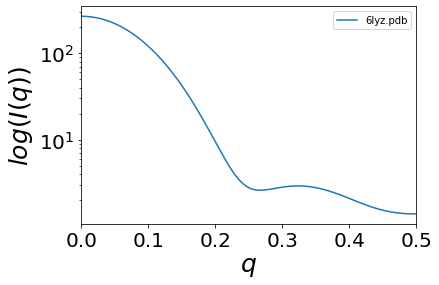

In [9]:
ax=df.plot(x='q',y='I',logy=True,fontsize=20,label='6lyz.pdb')
ax.set_xlabel('$q$',fontsize=25)
ax.set_ylabel('$log(I(q))$',fontsize=25)
#plt.savefig('Iq.png')